In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from IPython.display import display, HTML
import sqlite3
import tempfile
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

# Opis algorytmów

Wyświetane poniżej ramki to wyniki AUC klasyfikacji na postawie trzech algorytmów z biblioteki sklearn:
- RandomForestClassifier
- LinearDiscriminantAnalysis
- KNeighborsClassifier

In [19]:
ramka_drzewa = pd.read_csv("D:/Python/pd4/wyniki/AUC_drzewa.csv", sep = ',',index_col=0)
ramka_lda = pd.read_csv("D:/Python/pd4/wyniki/AUC_lda.csv", sep = ',',index_col=0)
ramka_knn = pd.read_csv("D:/Python/pd4/wyniki/AUC_knn.csv", sep = ',',index_col=0)
wyniki_polaczone = pd.read_csv("D:/Python/pd4/wyniki/polaczone.csv", sep = ',',index_col=0)


display(ramka_drzewa)
display(ramka_lda)
display(ramka_knn)

,AUC_drzewa,nazwy
0,0.960976,BreastCancer
1,0.808081,ecoli
2,0.753846,Glass
3,0.971698,Ionosphere
4,1.000000,iris
5,0.731602,pimaDiabetes_norm
6,0.604317,SAheart
7,0.936508,seeds
8,0.761905,sonar-all-data
9,0.937726,spam


,AUC_lda,nazwy
0,0.951220,BreastCancer
1,0.878788,ecoli
2,0.692308,Glass
3,0.801887,Ionosphere
4,0.977778,iris
5,0.757576,pimaDiabetes_norm
6,0.712230,SAheart
7,0.968254,seeds
8,0.777778,sonar-all-data
9,0.897176,spam


,AUC_knn,nazwy
0,0.941463,BreastCancer
1,0.898990,ecoli
2,0.815385,Glass
3,0.716981,Ionosphere
4,0.955556,iris
5,0.722944,pimaDiabetes_norm
6,0.618705,SAheart
7,0.873016,seeds
8,0.873016,sonar-all-data
9,0.780594,spam



 # Statystyki oraz wizualizacje


Dla każdego rozważanego zbioru otzymaliśmy wartość indeksu AUC.Zatem kolumnę takiego zbioru możemy
potraktować jako próbkę, o długości równej ilości wczytanych zbiorów. Zbadajmy zachowane się  każdego z klasyfikatorów.

In [35]:
wyniki_polaczone.head(6)

,nazwy,AUC_drzewa,AUC_lda,AUC_knn
0,BreastCancer,0.960976,0.951220,0.941463
1,ecoli,0.808081,0.878788,0.898990
2,Glass,0.753846,0.692308,0.815385
3,Ionosphere,0.971698,0.801887,0.716981
4,iris,1.000000,0.977778,0.955556
5,pimaDiabetes_norm,0.731602,0.757576,0.722944


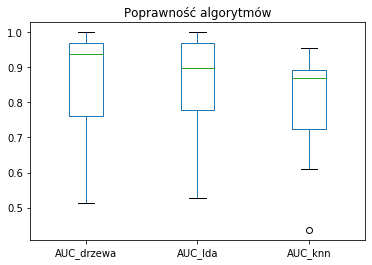

In [45]:

wyniki_polaczone.plot(kind='box')
plt.title('Poprawność algorytmów') 
plt.show()

Widać że średno algorytm RandomForest działa lepiej niż funckje knn oraz LDA.
*  Średnia poprawność algorytmu RandomForestClassifier mierzona indeksem AUC wynosi ok 95 %.
*  W przypadku funkcji LinearDiscriminantAnalysis oraz KNeighborsClassifier wyniki są poprawne w średnio 87% - 90%
*  Widać też że algorytm RandomForestClassifier oraz LinearDiscriminantAnalysis są mniej stabilne, o czym świadczy rozrzut punktów.

# Wykres średniej miary poprawności w zależności od algorytmu

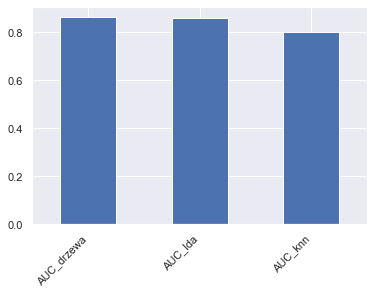

In [53]:

sns.set()
fig = wyniki_polaczone[["AUC_drzewa", "AUC_lda", "AUC_knn"]].mean().plot(kind='bar')
fig.set_xticklabels(wyniki_polaczone[["AUC_drzewa", "AUC_lda", "AUC_knn"]], rotation = 45, ha="right")
plt.show()

*  średnie wyniki AUC dla rozważanych algorytmów utrzymują się na podobnym poziomie.
* najsłabiej, choć nieznacznie mniej od reszty wypadł algorytm knn.